In [50]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [51]:
# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
pd.set_option('display.max_columns', None)

In [52]:
df = pd.read_csv('Amazon_Sales_Data.csv')  # Update with your actual file name
print("Data loaded successfully!")
df.head()

Data loaded successfully!


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [53]:
print("\n=== Data Overview ===")
print(f"Dataset shape: {df.shape}")


=== Data Overview ===
Dataset shape: (128976, 21)


In [54]:
print("\nFirst 5 rows:")
print(df.head())


First 5 rows:
   index             Order ID      Date                        Status  \
0      0  405-8078784-5731545  04-30-22                     Cancelled   
1      1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146  04-30-22                       Shipped   
3      3  403-9615377-8133951  04-30-22                     Cancelled   
4      4  407-1069790-7240320  04-30-22                       Shipped   

  Fulfilment Sales Channel ship-service-level  Category Size Courier Status  \
0   Merchant     Amazon.in           Standard   T-shirt    S     On the Way   
1   Merchant     Amazon.in           Standard     Shirt  3XL        Shipped   
2     Amazon     Amazon.in          Expedited     Shirt   XL        Shipped   
3   Merchant     Amazon.in           Standard   Blazzer    L     On the Way   
4     Amazon     Amazon.in          Expedited  Trousers  3XL        Shipped   

   Qty currency  Amount    ship-city   ship-state  ship-postal-code  \


In [55]:
print("\nData types and missing values:")
print(df.info())


Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  sh

In [56]:
print("\nSummary statistics:")
print(df.describe(include='all'))


Summary statistics:
                index             Order ID        Date   Status Fulfilment  \
count   128976.000000               128976      128976   128976     128976   
unique            NaN               120229          91       13          2   
top               NaN  403-4984515-8861958  05-03-2022  Shipped     Amazon   
freq              NaN                   12        2085    77815      89713   
mean     64486.130427                  NaN         NaN      NaN        NaN   
std      37232.897832                  NaN         NaN      NaN        NaN   
min          0.000000                  NaN         NaN      NaN        NaN   
25%      32242.750000                  NaN         NaN      NaN        NaN   
50%      64486.500000                  NaN         NaN      NaN        NaN   
75%      96730.250000                  NaN         NaN      NaN        NaN   
max     128974.000000                  NaN         NaN      NaN        NaN   

       Sales Channel ship-service-level Ca

In [57]:
## 2. Data Preparation
print("\n=== Data Preparation ===")

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Create Revenue column (Amount × Qty)
df['Revenue'] = df['Amount'] * df['Qty']

# Extract time-based features
df['Order_Year'] = df['Date'].dt.year
df['Order_Month'] = df['Date'].dt.month
df['Order_Day'] = df['Date'].dt.day
df['Order_DayOfWeek'] = df['Date'].dt.day_name()
df['Order_Week'] = df['Date'].dt.isocalendar().week

# Handle missing values
print("\nMissing values before cleaning:")
print(df.isnull().sum())

# Fill numeric missing values with 0
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(0)

# Fill categorical missing values
categorical_cols = df.select_dtypes(include='object').columns
df[categorical_cols] = df[categorical_cols].fillna('Unknown')

print("\nMissing values after cleaning:")
print(df.isnull().sum())



=== Data Preparation ===

Missing values before cleaning:
index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7800
Amount                  7800
ship-city                 35
ship-state                35
ship-postal-code          35
ship-country              35
B2B                        0
fulfilled-by           89713
New                   128976
PendingS              128976
Revenue                 7800
Order_Year                 0
Order_Month                0
Order_Day                  0
Order_DayOfWeek            0
Order_Week                 0
dtype: int64

Missing values after cleaning:
index                 0
Order ID              0
Date                  0
Status                0
Fulfilment       


=== Sales Performance Analysis ===


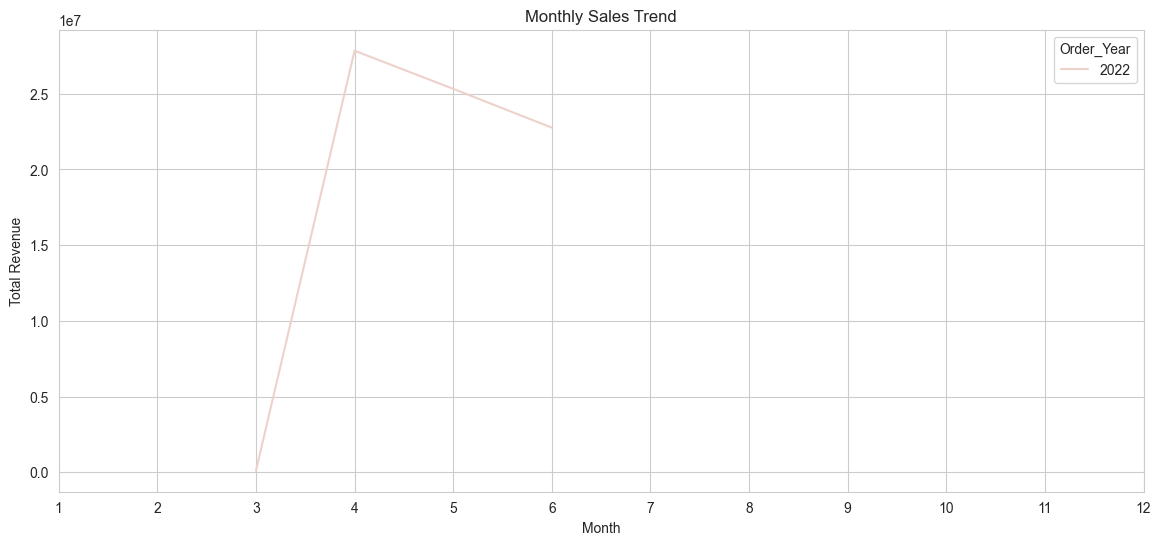

In [58]:
## 3. Sales Performance Analysis
print("\n=== Sales Performance Analysis ===")

# Monthly sales trend
monthly_sales = df.groupby(['Order_Year', 'Order_Month'])['Revenue'].sum().reset_index()
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_sales, x='Order_Month', y='Revenue', hue='Order_Year')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(range(1, 13))
plt.show()

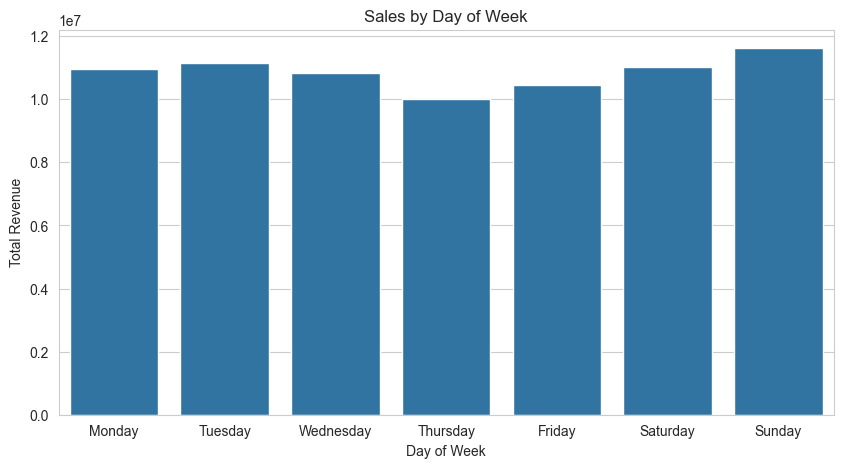

In [59]:
# Daily sales pattern
daily_sales = df.groupby('Order_DayOfWeek')['Revenue'].sum().reset_index()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_sales['Order_DayOfWeek'] = pd.Categorical(daily_sales['Order_DayOfWeek'], categories=day_order, ordered=True)
daily_sales = daily_sales.sort_values('Order_DayOfWeek')

plt.figure(figsize=(10, 5))
sns.barplot(data=daily_sales, x='Order_DayOfWeek', y='Revenue')
plt.title('Sales by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Revenue')
plt.show()

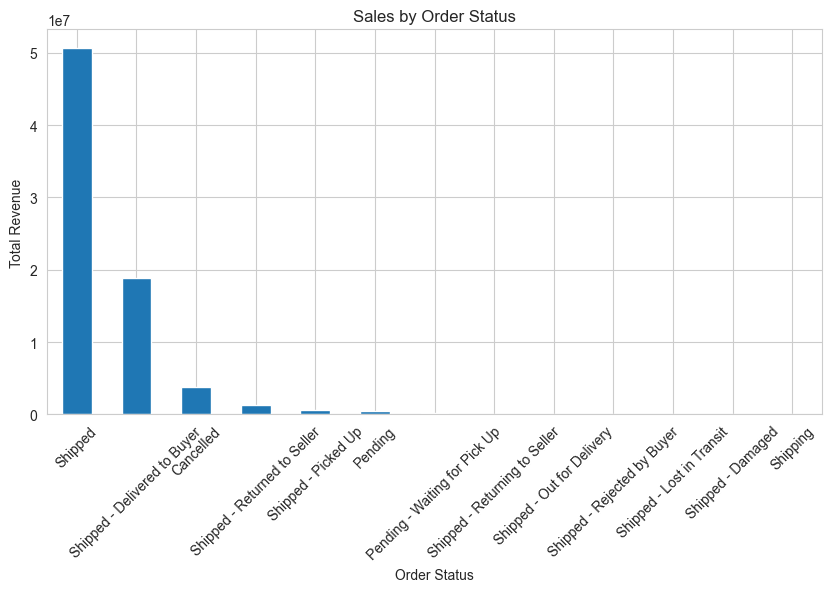

In [60]:
# Sales by status
status_sales = df.groupby('Status')['Revenue'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
status_sales.plot(kind='bar')
plt.title('Sales by Order Status')
plt.xlabel('Order Status')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()


=== Product Analysis ===


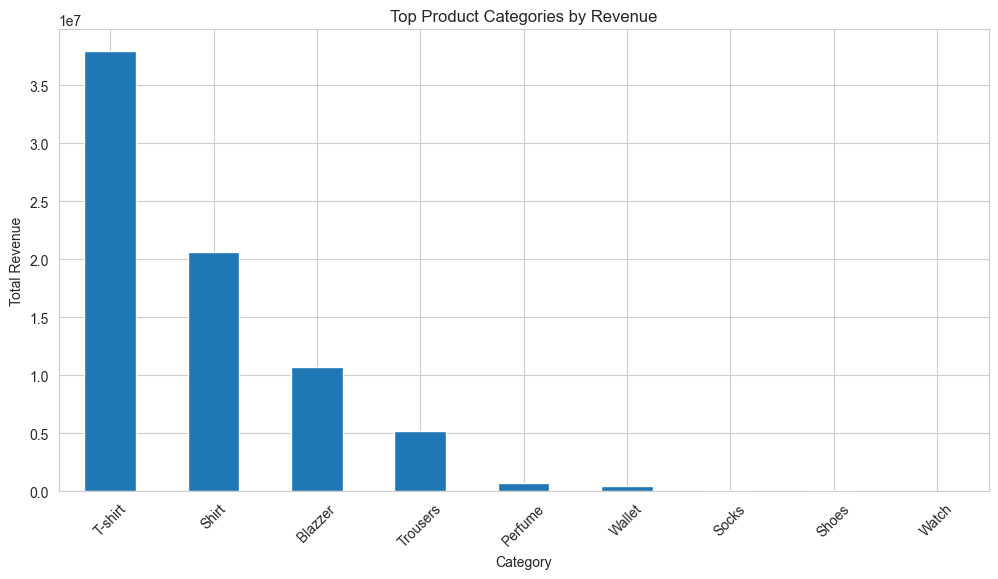

In [61]:
## 4. Product Analysis
print("\n=== Product Analysis ===")

# Top product categories by revenue
top_categories = df.groupby('Category')['Revenue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
top_categories.plot(kind='bar')
plt.title('Top Product Categories by Revenue')
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()


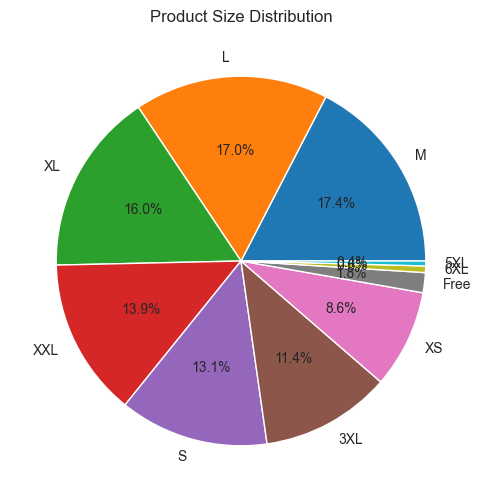

In [62]:
# Product size distribution
size_dist = df['Size'].value_counts().head(10)
plt.figure(figsize=(10, 6))
size_dist.plot(kind='pie', autopct='%1.1f%%')
plt.title('Product Size Distribution')
plt.ylabel('')
plt.show()

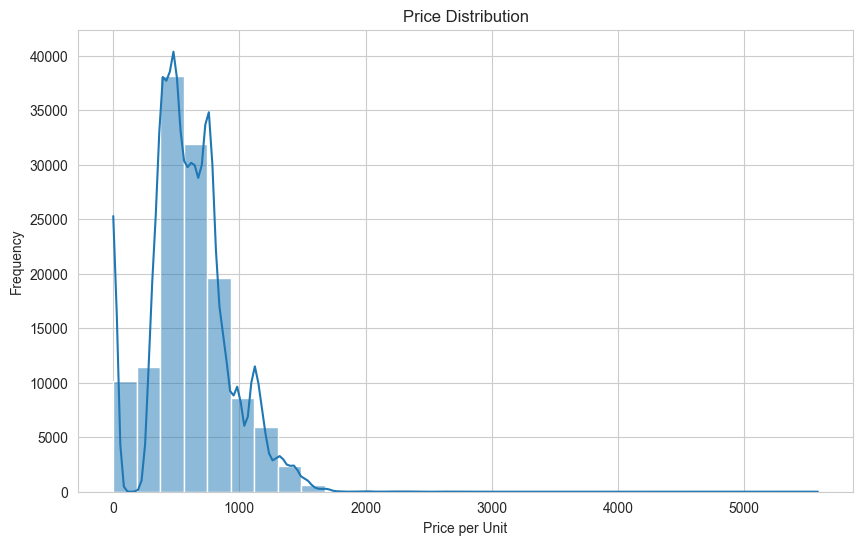

In [63]:
# Price distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price per Unit')
plt.ylabel('Frequency')
plt.show()


=== Fulfillment Analysis ===


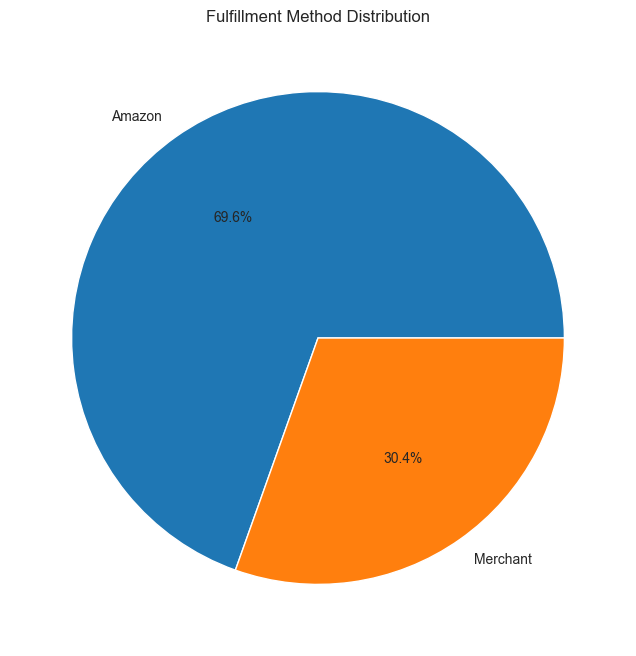

In [64]:
## 5. Fulfillment Analysis
print("\n=== Fulfillment Analysis ===")

# Fulfillment method distribution
fulfillment_dist = df['Fulfilment'].value_counts()
plt.figure(figsize=(8, 8))
fulfillment_dist.plot(kind='pie', autopct='%1.1f%%')
plt.title('Fulfillment Method Distribution')
plt.ylabel('')
plt.show()

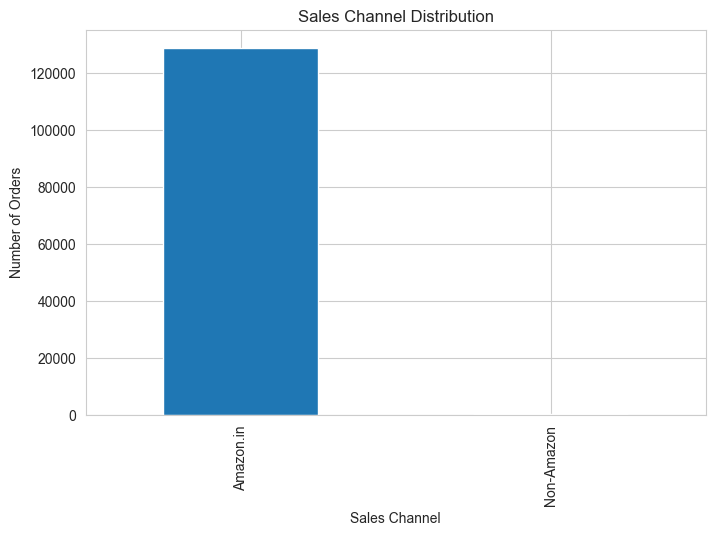

In [65]:
# Sales channel distribution
channel_dist = df['Sales Channel'].value_counts()
plt.figure(figsize=(8, 5))
channel_dist.plot(kind='bar')
plt.title('Sales Channel Distribution')
plt.xlabel('Sales Channel')
plt.ylabel('Number of Orders')
plt.show()


=== Geographical Analysis ===


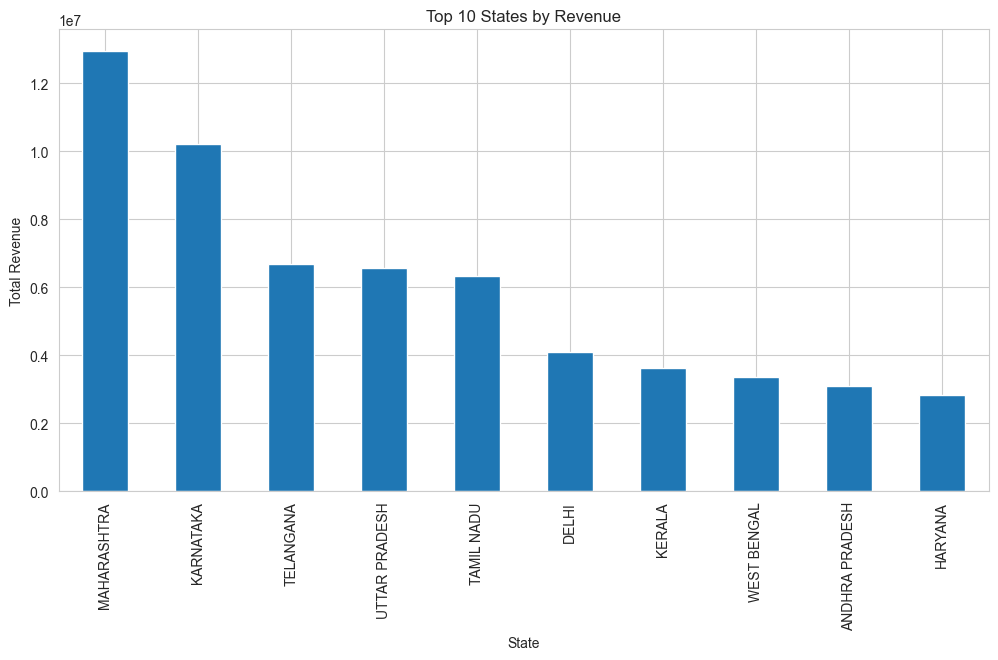

In [66]:
## 6. Geographical Analysis
print("\n=== Geographical Analysis ===")

# Top states by revenue
state_sales = df.groupby('ship-state')['Revenue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
state_sales.plot(kind='bar')
plt.title('Top 10 States by Revenue')
plt.xlabel('State')
plt.ylabel('Total Revenue')
plt.show()

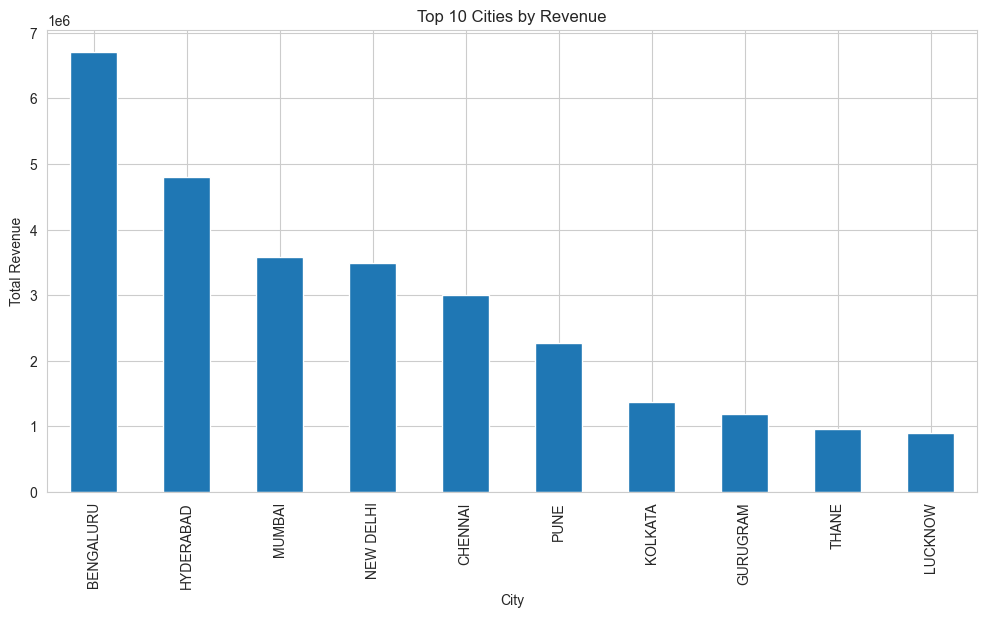

In [67]:
# Top cities by revenue
city_sales = df.groupby('ship-city')['Revenue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
city_sales.plot(kind='bar')
plt.title('Top 10 Cities by Revenue')
plt.xlabel('City')
plt.ylabel('Total Revenue')
plt.show()


=== B2B vs B2C Analysis ===


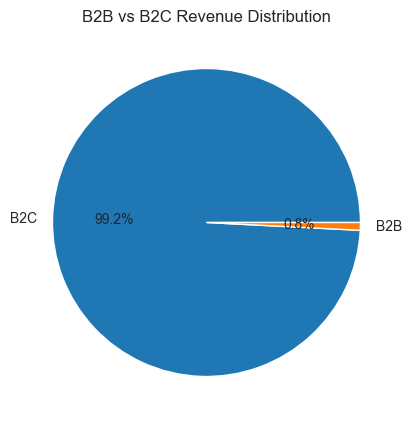

In [69]:
# Interactive map visualization (US only)
if df['ship-country'].nunique() == 1 and df['ship-country'].iloc[0] == 'US':
    state_revenue = df.groupby('ship-state')['Revenue'].sum().reset_index()
    
    fig = px.choropleth(state_revenue,
                        locations='ship-state',
                        locationmode="USA-states",
                        color='Revenue',
                        scope="usa",
                        title='Revenue by State',
                        color_continuous_scale='Viridis')
    fig.show()
## 7. B2B vs B2C Analysis
print("\n=== B2B vs B2C Analysis ===")

if 'B2B' in df.columns:
    b2b_sales = df.groupby('B2B')['Revenue'].sum()
    plt.figure(figsize=(8, 5))
    b2b_sales.plot(kind='pie', autopct='%1.1f%%', labels=['B2C', 'B2B'])
    plt.title('B2B vs B2C Revenue Distribution')
    plt.ylabel('')
    plt.show()



=== Courier Performance Analysis ===


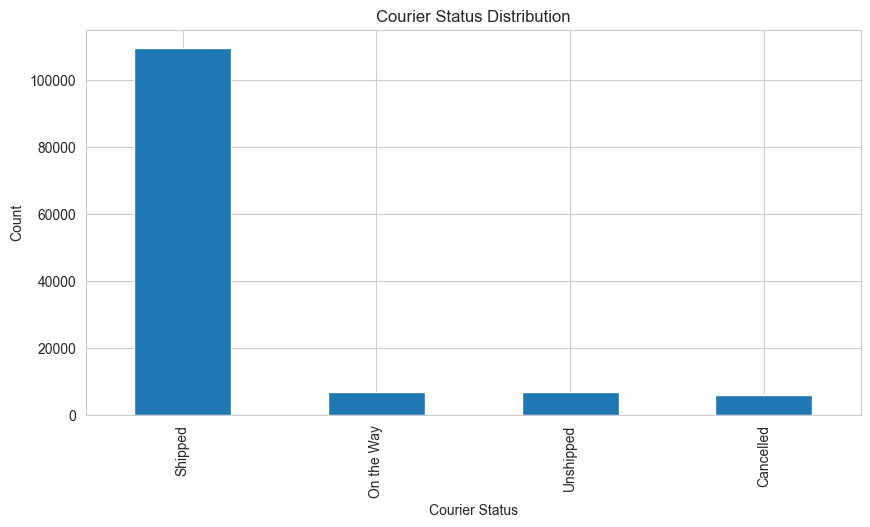

In [70]:
## 8. Courier Performance Analysis
print("\n=== Courier Performance Analysis ===")

if 'Courier Status' in df.columns:
    courier_status = df['Courier Status'].value_counts()
    plt.figure(figsize=(10, 5))
    courier_status.plot(kind='bar')
    plt.title('Courier Status Distribution')
    plt.xlabel('Courier Status')
    plt.ylabel('Count')
    plt.show()



=== Advanced Analysis ===

RFM Analysis:


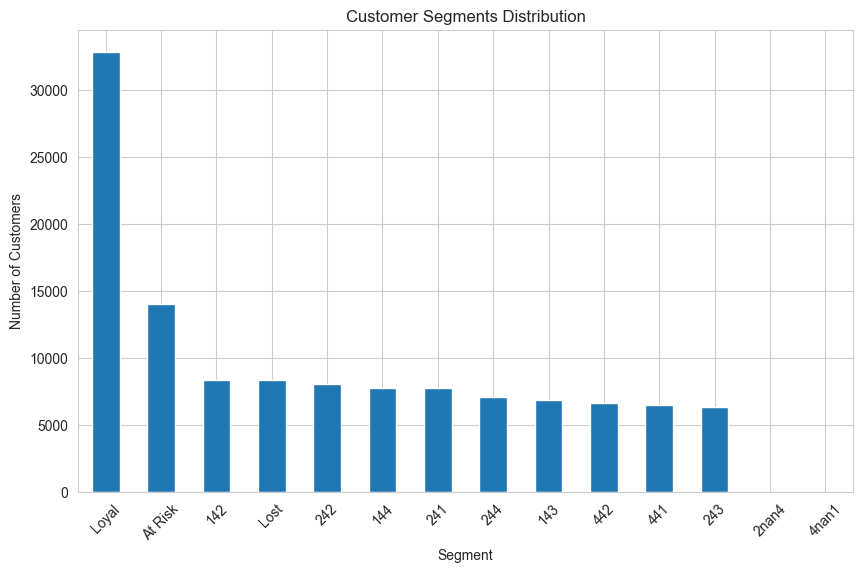

In [80]:
## 9. Advanced Analysis
print("\n=== Advanced Analysis ===")

# RFM Analysis (Customer Segmentation)
if 'Order ID' in df.columns:  # Using Order ID as proxy for customer
    print("\nRFM Analysis:")

    snapshot_date = df['Date'].max() + pd.Timedelta(days=1)
    rfm = df.groupby('Order ID').agg({
        'Date': lambda x: (snapshot_date - x.max()).days,  # Recency
        'Order ID': 'count',  # Frequency
        'Revenue': 'sum'  # Monetary Value
    }).rename(columns={
        'Date': 'Recency',
        'Order ID': 'Frequency',
        'Revenue': 'MonetaryValue'
    })

    # Create RFM segments, handling potential duplicate bin edges for Frequency
    try:
        rfm['R_Quartile'] = pd.qcut(rfm['Recency'], 4, labels=['1', '2', '3', '4'])
        _, f_bins = pd.qcut(rfm['Frequency'], 4, retbins=True, duplicates='drop')
        f_labels = [str(4 - i) for i in range(len(f_bins) - 1)]
        rfm['F_Quartile'] = pd.cut(rfm['Frequency'], bins=f_bins, labels=f_labels, right=False, include_lowest=True)
        rfm['M_Quartile'] = pd.qcut(rfm['MonetaryValue'], 4, labels=['4', '3', '2', '1'])
    except ValueError as e:
        print(f"Error during frequency quartile calculation: {e}")
        print("Number of unique frequency values:", rfm['Frequency'].nunique())
        print("Using fewer frequency segments due to limited unique values.")
        # Fallback to using the number of unique frequency values as the number of quantiles
        num_unique_freq = rfm['Frequency'].nunique()
        if num_unique_freq > 1:
            f_labels = [str(num_unique_freq - i) for i in range(num_unique_freq)]
            rfm['F_Quartile'] = pd.qcut(rfm['Frequency'], q=num_unique_freq, labels=f_labels, duplicates='drop')
        else:
            rfm['F_Quartile'] = '1' # Assign all the same quartile if only one unique value

    rfm['RFM_Score'] = rfm['R_Quartile'].astype(str) + rfm['F_Quartile'].astype(str) + rfm['M_Quartile'].astype(str)

    # Segment mapping
    segment_map = {
        r'111|112|121|131|141|151': 'Lost',
        r'332|322|233|232|223|222|132|123|122|212|213': 'Hibernating',
        r'311|411|331|421|341|321|412|342|421|422|432|332|432': 'At Risk',
        r'433|434|443|444|343|344|353|354|355|454|455|445': 'Loyal',
        r'511|512|513|514|515|521|522|523|524|525|531|532|533|534|535|541|542|543|544|545': 'Champions'
    }

    rfm['Segment'] = rfm['RFM_Score'].replace(segment_map, regex=True)
    rfm['Segment'] = rfm['Segment'].fillna('Potential')

    # Visualize segments
    plt.figure(figsize=(10, 6))
    rfm['Segment'].value_counts().plot(kind='bar')
    plt.title('Customer Segments Distribution')
    plt.xlabel('Segment')
    plt.ylabel('Number of Customers')
    plt.xticks(rotation=45)
    plt.show()

In [77]:
## 10. Business Insights & Recommendations
print("\n=== Business Insights ===")

# Calculate key metrics
total_revenue = df['Revenue'].sum()
avg_order_value = df['Revenue'].mean()
top_category = df.groupby('Category')['Revenue'].sum().idxmax()
top_state = df.groupby('ship-state')['Revenue'].sum().idxmax()
fulfillment_ratio = df['Fulfilment'].value_counts(normalize=True).iloc[0] * 100

# Generate insights
insights = {
    "Total Revenue": f"${total_revenue:,.2f}",
    "Average Order Value": f"${avg_order_value:,.2f}",
    "Top Product Category": f"{top_category} (contributes {df[df['Category'] == top_category]['Revenue'].sum()/total_revenue:.1%} of revenue)",
    "Top Performing State": top_state,
    "Dominant Fulfillment Method": f"{df['Fulfilment'].mode()[0]} ({fulfillment_ratio:.1f}% of orders)",
    "Order Status Distribution": ", ".join([f"{status}: {count}" for status, count in df['Status'].value_counts().items()])
}

print("\nKey Metrics and Insights:")
for metric, value in insights.items():
    print(f"- {metric}: {value}")

print("\nRecommendations:")
recommendations = [
    f"Focus marketing efforts on {top_category} category which drives the most revenue",
    f"Expand operations in {top_state} which is the top performing state",
    f"Optimize the {df['Fulfilment'].mode()[0]} fulfillment process which handles most orders",
    "Investigate and improve orders with non-completed statuses",
    "Develop targeted promotions for high-value customer segments",
    "Analyze shipping performance in low-revenue states for improvement opportunities"
]

for i, rec in enumerate(recommendations, 1):
    print(f"{i}. {rec}")


=== Business Insights ===

Key Metrics and Insights:
- Total Revenue: $76,031,267.00
- Average Order Value: $589.50
- Top Product Category: T-shirt (contributes 49.9% of revenue)
- Top Performing State: MAHARASHTRA
- Dominant Fulfillment Method: Amazon (69.6% of orders)
- Order Status Distribution: Shipped: 77815, Shipped - Delivered to Buyer: 28756, Cancelled: 18334, Shipped - Returned to Seller: 1954, Shipped - Picked Up: 973, Pending: 658, Pending - Waiting for Pick Up: 281, Shipped - Returning to Seller: 145, Shipped - Out for Delivery: 35, Shipped - Rejected by Buyer: 11, Shipping: 8, Shipped - Lost in Transit: 5, Shipped - Damaged: 1

Recommendations:
1. Focus marketing efforts on T-shirt category which drives the most revenue
2. Expand operations in MAHARASHTRA which is the top performing state
3. Optimize the Amazon fulfillment process which handles most orders
4. Investigate and improve orders with non-completed statuses
5. Develop targeted promotions for high-value customer 

In [78]:
## 11. Export Results
# Save cleaned data
df.to_csv('Cleaned_Amazon_Sales_Data.csv', index=False)

# Generate report
report = f"""
Amazon Sales Data Analysis Report
================================
Date: {datetime.today().strftime('%Y-%m-%d')}

1. Overview:
- Total Orders: {len(df):,}
- Time Period: {df['Date'].min().date()} to {df['Date'].max().date()}
- Total Revenue: ${total_revenue:,.2f}
- Average Order Value: ${avg_order_value:,.2f}

2. Key Findings:
{chr(10).join(f"- {k}: {v}" for k, v in insights.items())}

3. Recommendations:
{chr(10).join(f"- {rec}" for rec in recommendations)}
"""

with open('Amazon_Sales_Analysis_Report.txt', 'w') as f:
    f.write(report)

print("\nAnalysis complete! Results exported to:")
print("- Cleaned_Amazon_Sales_Data.csv")
print("- Amazon_Sales_Analysis_Report.txt")


Analysis complete! Results exported to:
- Cleaned_Amazon_Sales_Data.csv
- Amazon_Sales_Analysis_Report.txt



=== Customer Spending Analysis ===

Average Spending per 'Customer' (Order ID): $653.67
Median Spending per 'Customer' (Order ID): $612.00


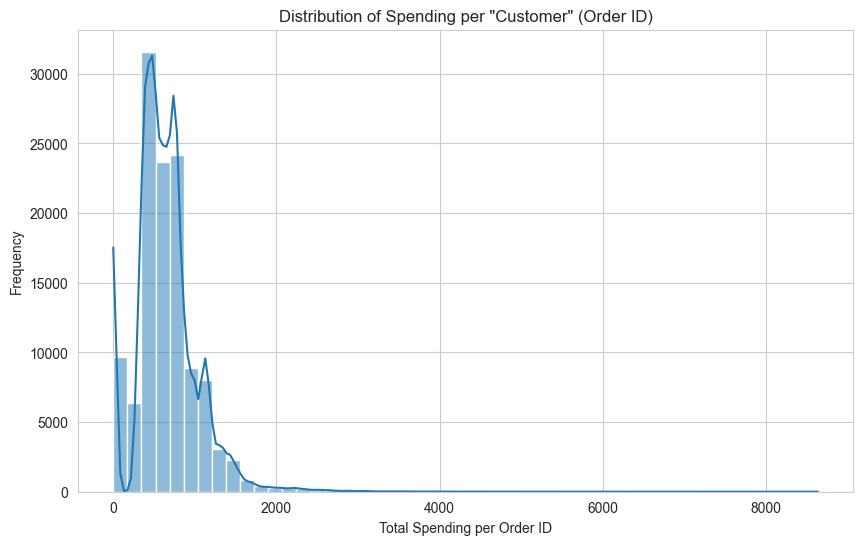

In [82]:
## 12. Customer Spending Analysis (Proxy for CLTV)
print("\n=== Customer Spending Analysis ===")

if 'Order ID' in df.columns:
    customer_spending = df.groupby('Order ID')['Amount'].sum().sort_values(ascending=False)
    average_spending_per_customer = customer_spending.mean()
    median_spending_per_customer = customer_spending.median()
    print(f"\nAverage Spending per 'Customer' (Order ID): ${average_spending_per_customer:.2f}")
    print(f"Median Spending per 'Customer' (Order ID): ${median_spending_per_customer:.2f}")

    plt.figure(figsize=(10, 6))
    sns.histplot(customer_spending, bins=50, kde=True)
    plt.title('Distribution of Spending per "Customer" (Order ID)')
    plt.xlabel('Total Spending per Order ID')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("\n'Order ID' column not found. Cannot perform Customer Spending Analysis.")


=== Detailed Fulfillment Analysis ===


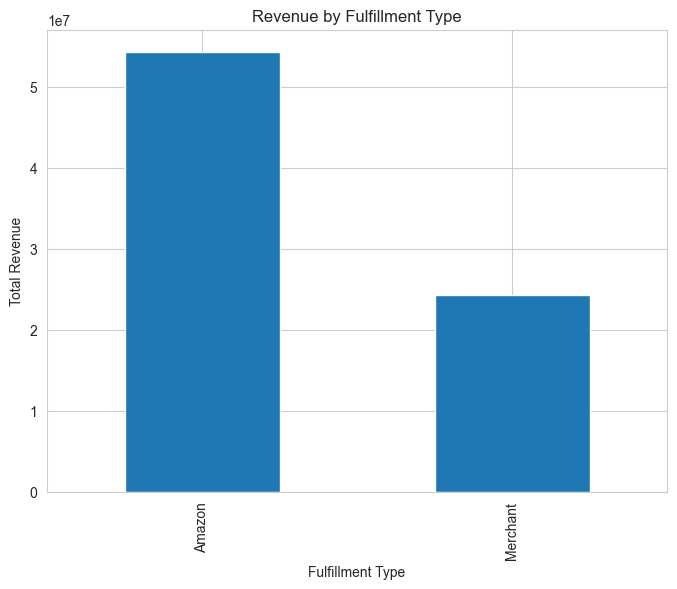


Average Order Amount by Fulfillment Type:
Fulfilment
Merchant    617.951513
Amazon      605.570430
Name: Amount, dtype: float64


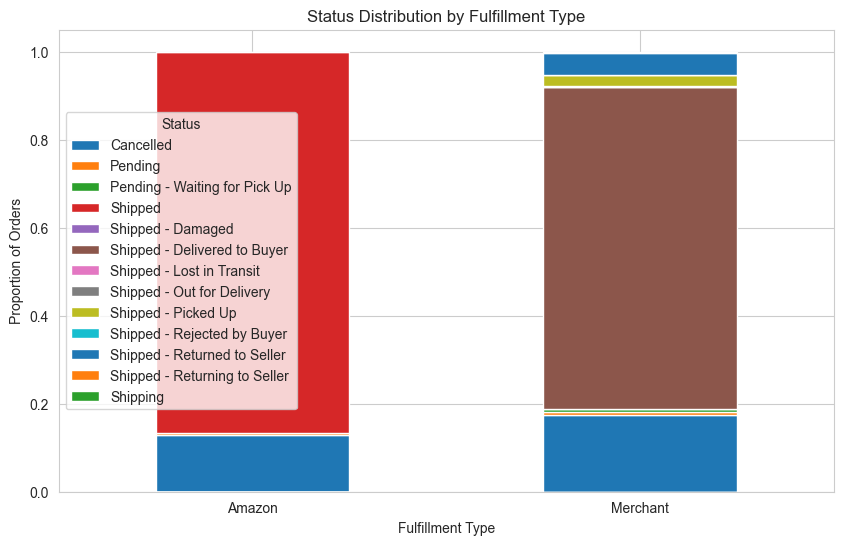

In [83]:
## 12. Fulfillment Analysis - Detailed
print("\n=== Detailed Fulfillment Analysis ===")

if 'Fulfilment' in df.columns:
    # Revenue by Fulfillment Type
    fulfillment_revenue = df.groupby('Fulfilment')['Amount'].sum().sort_values(ascending=False)
    plt.figure(figsize=(8, 6))
    fulfillment_revenue.plot(kind='bar')
    plt.title('Revenue by Fulfillment Type')
    plt.xlabel('Fulfillment Type')
    plt.ylabel('Total Revenue')
    plt.show()

    # Average Amount per Order by Fulfillment Type
    fulfillment_avg_amount = df.groupby('Fulfilment')['Amount'].mean().sort_values(ascending=False)
    print("\nAverage Order Amount by Fulfillment Type:")
    print(fulfillment_avg_amount)

    # Status Distribution by Fulfillment Type
    status_by_fulfillment = df.groupby('Fulfilment')['Status'].value_counts(normalize=True).unstack()
    status_by_fulfillment.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title('Status Distribution by Fulfillment Type')
    plt.xlabel('Fulfillment Type')
    plt.ylabel('Proportion of Orders')
    plt.xticks(rotation=0)
    plt.legend(title='Status')
    plt.show()

else:
    print("\n'Fulfilment' column not found. Cannot perform Detailed Fulfillment Analysis.")


=== Detailed Sales Channel Analysis ===


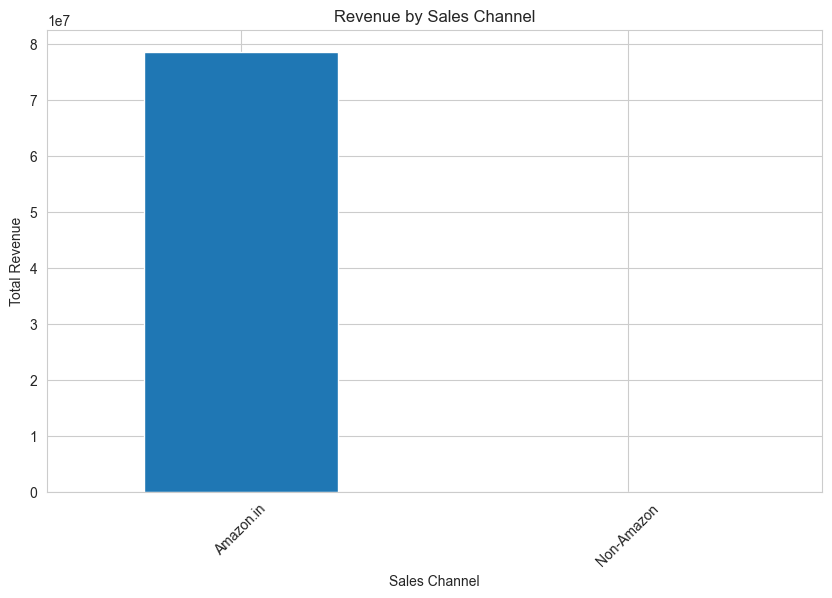


Average Order Amount by Sales Channel:
Sales Channel
Amazon.in     609.925886
Non-Amazon      0.000000
Name: Amount, dtype: float64


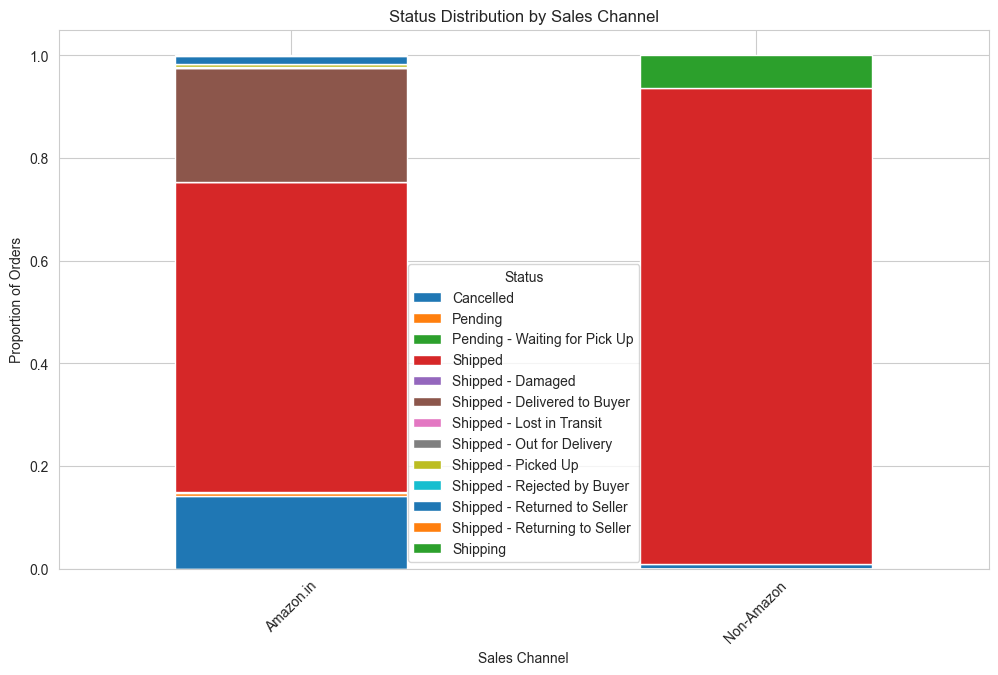

In [84]:
## 13. Sales Channel Analysis - Detailed
print("\n=== Detailed Sales Channel Analysis ===")

if 'Sales Channel' in df.columns:
    # Revenue by Sales Channel
    channel_revenue = df.groupby('Sales Channel')['Amount'].sum().sort_values(ascending=False)
    plt.figure(figsize=(10, 6))
    channel_revenue.plot(kind='bar')
    plt.title('Revenue by Sales Channel')
    plt.xlabel('Sales Channel')
    plt.ylabel('Total Revenue')
    plt.xticks(rotation=45)
    plt.show()

    # Average Amount per Order by Sales Channel
    channel_avg_amount = df.groupby('Sales Channel')['Amount'].mean().sort_values(ascending=False)
    print("\nAverage Order Amount by Sales Channel:")
    print(channel_avg_amount)

    # Status Distribution by Sales Channel
    status_by_channel = df.groupby('Sales Channel')['Status'].value_counts(normalize=True).unstack()
    status_by_channel.plot(kind='bar', stacked=True, figsize=(12, 7))
    plt.title('Status Distribution by Sales Channel')
    plt.xlabel('Sales Channel')
    plt.ylabel('Proportion of Orders')
    plt.xticks(rotation=45)
    plt.legend(title='Status')
    plt.show()

else:
    print("\n'Sales Channel' column not found. Cannot perform Detailed Sales Channel Analysis.")


=== Shipping Service Level Analysis ===


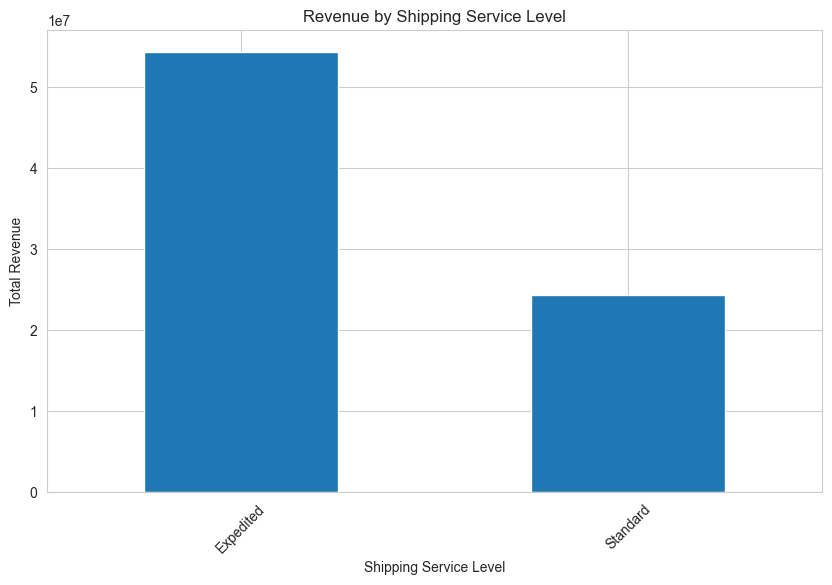


Average Order Amount by Shipping Service Level:
ship-service-level
Expedited    612.559562
Standard     602.265807
Name: Amount, dtype: float64


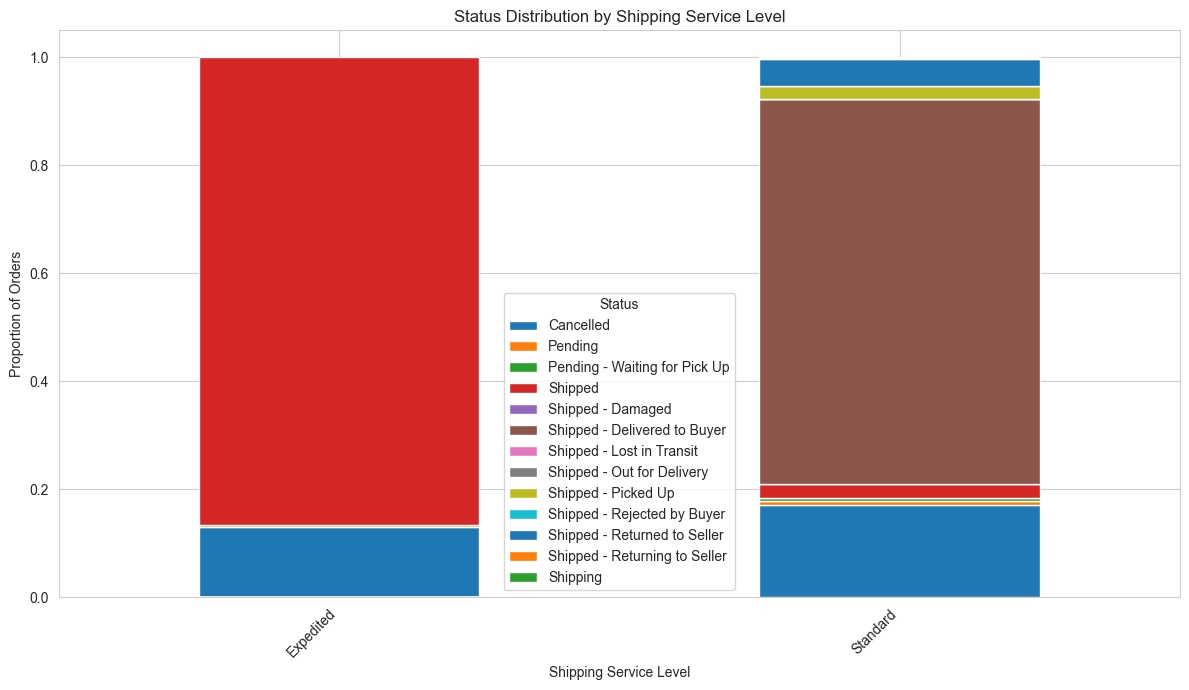

In [85]:
## 14. Shipping Service Level Analysis
print("\n=== Shipping Service Level Analysis ===")

if 'ship-service-level' in df.columns:
    # Revenue by Shipping Service Level
    service_level_revenue = df.groupby('ship-service-level')['Amount'].sum().sort_values(ascending=False)
    plt.figure(figsize=(10, 6))
    service_level_revenue.plot(kind='bar')
    plt.title('Revenue by Shipping Service Level')
    plt.xlabel('Shipping Service Level')
    plt.ylabel('Total Revenue')
    plt.xticks(rotation=45)
    plt.show()

    # Average Amount per Order by Shipping Service Level
    service_level_avg_amount = df.groupby('ship-service-level')['Amount'].mean().sort_values(ascending=False)
    print("\nAverage Order Amount by Shipping Service Level:")
    print(service_level_avg_amount)

    # Status Distribution by Shipping Service Level
    status_by_service_level = df.groupby('ship-service-level')['Status'].value_counts(normalize=True).unstack()
    status_by_service_level.plot(kind='bar', stacked=True, figsize=(12, 7))
    plt.title('Status Distribution by Shipping Service Level')
    plt.xlabel('Shipping Service Level')
    plt.ylabel('Proportion of Orders')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Status')
    plt.tight_layout()
    plt.show()

else:
    print("\n'ship-service-level' column not found. Cannot perform Shipping Service Level Analysis.")


=== Product Size Analysis - Revenue ===


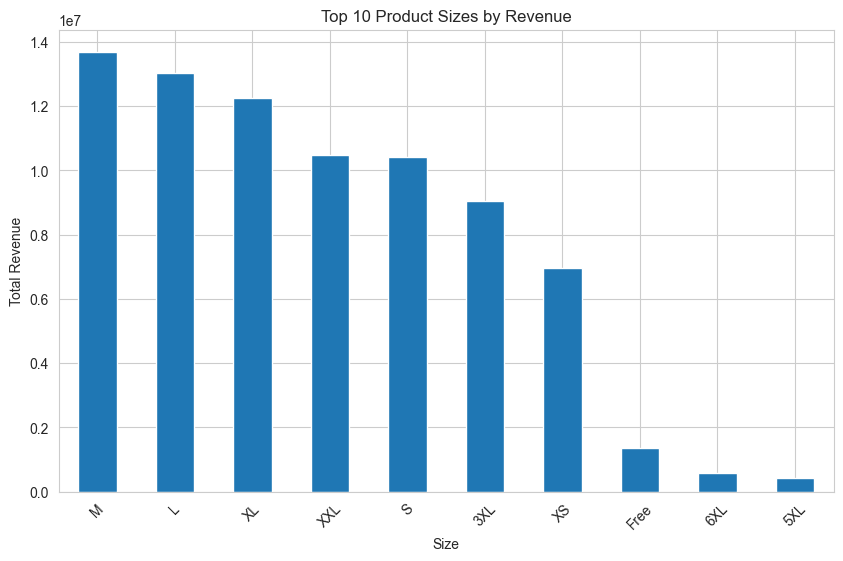


Average Quantity Ordered by Top 10 Sizes:
Size
5XL     0.932727
6XL     0.932249
4XL     0.932084
Free    0.919591
XXL     0.912389
3XL     0.912381
XL      0.906905
L       0.903655
M       0.900103
S       0.896578
Name: Qty, dtype: float64


In [86]:
## 15. Product Size Analysis - Revenue
print("\n=== Product Size Analysis - Revenue ===")

if 'Size' in df.columns:
    size_revenue = df.groupby('Size')['Amount'].sum().sort_values(ascending=False).head(10)
    plt.figure(figsize=(10, 6))
    size_revenue.plot(kind='bar')
    plt.title('Top 10 Product Sizes by Revenue')
    plt.xlabel('Size')
    plt.ylabel('Total Revenue')
    plt.xticks(rotation=45)
    plt.show()

    size_avg_qty = df.groupby('Size')['Qty'].mean().sort_values(ascending=False).head(10)
    print("\nAverage Quantity Ordered by Top 10 Sizes:")
    print(size_avg_qty)

else:
    print("\n'Size' column not found. Cannot perform Product Size Revenue Analysis.")


=== Courier Status vs. Order Status Analysis ===

Cross-tabulation of Courier Status vs. Order Status:
Status          Cancelled  Pending  Pending - Waiting for Pick Up  Shipped  \
Courier Status                                                               
Cancelled            5845        2                              0       93   
On the Way           6859        0                              0        0   
Shipped                 0       10                              0    77607   
Unshipped            5630      646                            281      115   

Status          Shipped - Damaged  Shipped - Delivered to Buyer  \
Courier Status                                                    
Cancelled                       0                             0   
On the Way                      0                             8   
Shipped                         1                         28748   
Unshipped                       0                             0   

Status          Shipped 

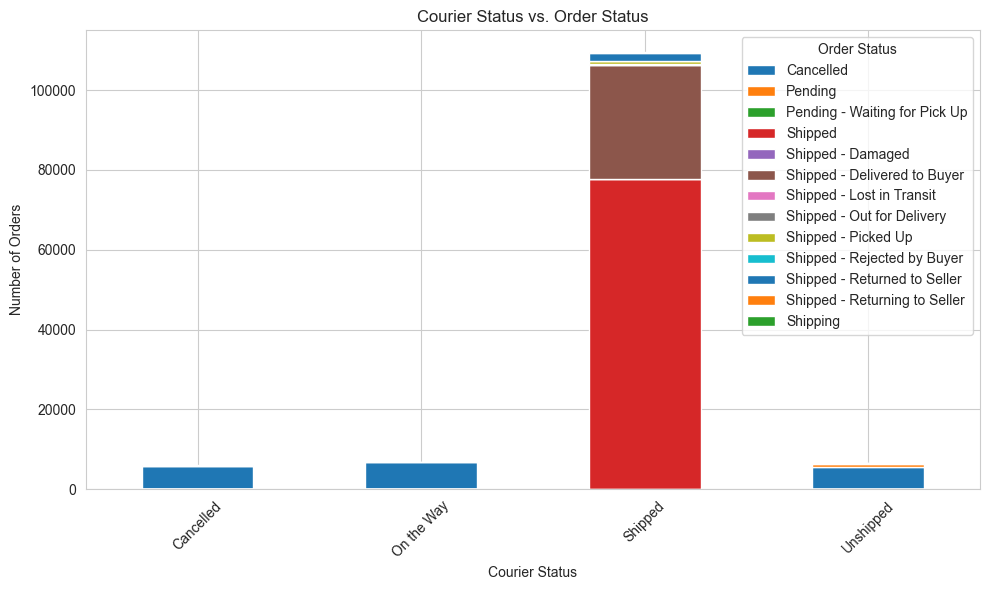

In [87]:
## 16. Courier Status vs. Order Status Analysis
print("\n=== Courier Status vs. Order Status Analysis ===")

if 'Courier Status' in df.columns and 'Status' in df.columns:
    cross_tab_status = pd.crosstab(df['Courier Status'], df['Status'])
    print("\nCross-tabulation of Courier Status vs. Order Status:")
    print(cross_tab_status)

    cross_tab_status.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title('Courier Status vs. Order Status')
    plt.xlabel('Courier Status')
    plt.ylabel('Number of Orders')
    plt.xticks(rotation=45)
    plt.legend(title='Order Status')
    plt.tight_layout()
    plt.show()

else:
    print("\n'Courier Status' or 'Status' column not found. Cannot perform this analysis.")


=== Quantity Analysis ===


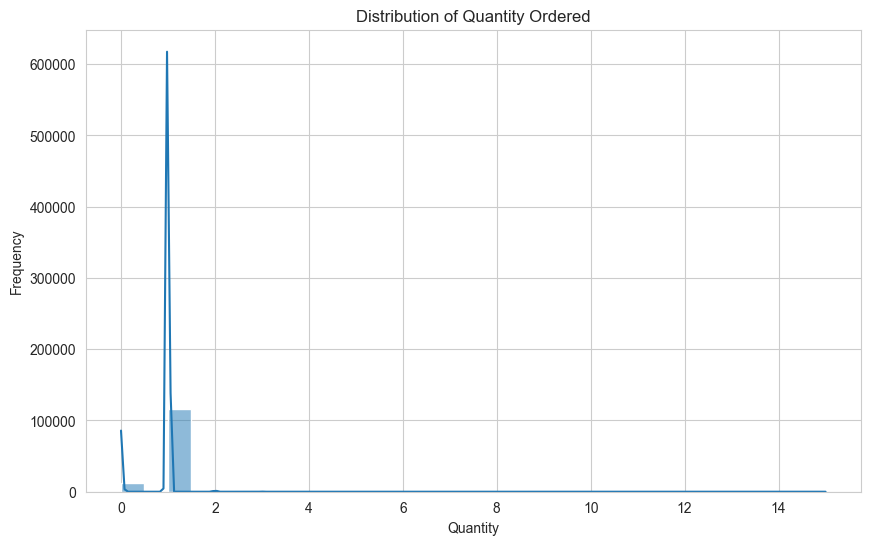


Average Quantity Ordered: 0.90
Median Quantity Ordered: 1.00


In [88]:
## 17. Quantity Analysis
print("\n=== Quantity Analysis ===")

if 'Qty' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Qty'], bins=30, kde=True)
    plt.title('Distribution of Quantity Ordered')
    plt.xlabel('Quantity')
    plt.ylabel('Frequency')
    plt.show()

    average_quantity = df['Qty'].mean()
    median_quantity = df['Qty'].median()
    print(f"\nAverage Quantity Ordered: {average_quantity:.2f}")
    print(f"Median Quantity Ordered: {median_quantity:.2f}")

else:
    print("\n'Qty' column not found. Cannot perform Quantity Analysis.")


=== Currency Analysis ===


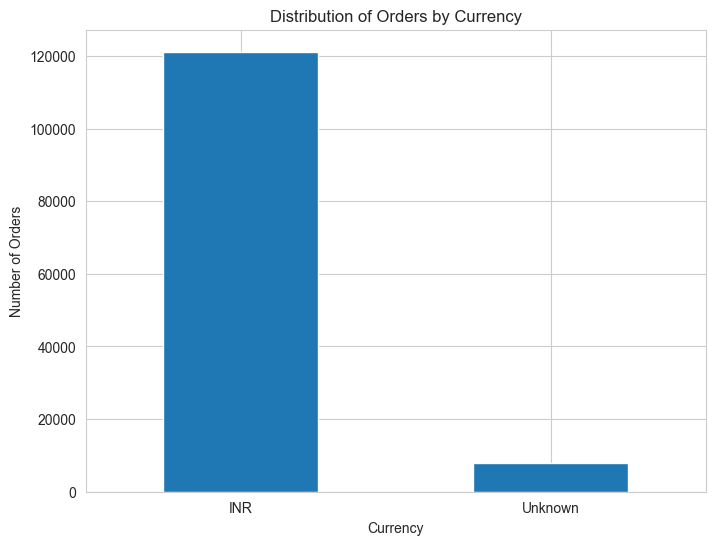


Number of Orders by Currency:
currency
INR        121176
Unknown      7800
Name: count, dtype: int64


In [89]:
## 18. Currency Analysis
print("\n=== Currency Analysis ===")

if 'currency' in df.columns:
    currency_counts = df['currency'].value_counts()
    plt.figure(figsize=(8, 6))
    currency_counts.plot(kind='bar')
    plt.title('Distribution of Orders by Currency')
    plt.xlabel('Currency')
    plt.ylabel('Number of Orders')
    plt.xticks(rotation=0)
    plt.show()

    print("\nNumber of Orders by Currency:")
    print(currency_counts)

else:
    print("\n'currency' column not found. Cannot perform Currency Analysis.")


=== Fulfilled By Analysis ===


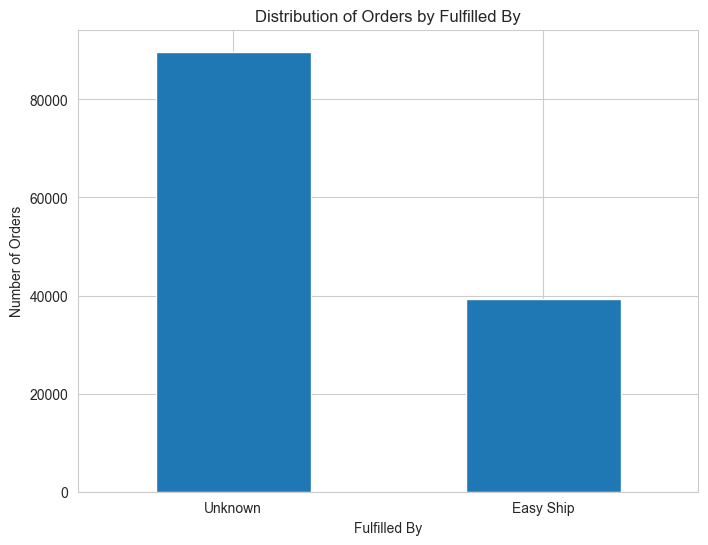


Revenue by Fulfilled By:
fulfilled-by
Unknown      54327540.00
Easy Ship    24262630.25
Name: Amount, dtype: float64


In [90]:
## 19. Fulfilled By Analysis
print("\n=== Fulfilled By Analysis ===")

if 'fulfilled-by' in df.columns:
    fulfilled_by_counts = df['fulfilled-by'].value_counts()
    plt.figure(figsize=(8, 6))
    fulfilled_by_counts.plot(kind='bar')
    plt.title('Distribution of Orders by Fulfilled By')
    plt.xlabel('Fulfilled By')
    plt.ylabel('Number of Orders')
    plt.xticks(rotation=0)
    plt.show()

    fulfilled_by_revenue = df.groupby('fulfilled-by')['Amount'].sum().sort_values(ascending=False)
    print("\nRevenue by Fulfilled By:")
    print(fulfilled_by_revenue)

else:
    print("\n'fulfilled-by' column not found. Cannot perform Fulfilled By Analysis.")